Getting rid of bottom bands - Jessica's run (run01)
===================================================

Run01 Jessica's runs (360x360x90, her bathymetry and stratification initial files)
--------------------------------------------------------------

Initial stratifications, Depths 162, 315, 705 m, Across-shelf slice 40; T, NO3, S, and velocity plots
Run01 and run03 from 180x180x35_BodyForcing_6Tr_LinProfiles

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl



In [2]:
#'''
#NAME
#    Custom Colormaps for Matplotlib
#PURPOSE
#    This program shows how to implement make_cmap which is a function that
#    generates a colorbar.  If you want to look at different color schemes,
#    check out https://kuler.adobe.com/create.
#PROGRAMMER(S)
#    Chris Slocum
#REVISION HISTORY
#    20130411 -- Initial version created
#    20140313 -- Small changes made and code posted online
#    20140320 -- Added the ability to set the position of each color
#'''

def make_cmap(colors, position=None, bit=False):
    #'''
    #make_cmap takes a list of tuples which contain RGB values. The RGB
    #values may either be in 8-bit [0 to 255] (in which bit must be set to
    #rue when called) or arithmetic [0 to 1] (default). make_cmap returns
    #a cmap with equally spaced colors.
    #Arrange your tuples so that the first color is the lowest value for the
    #colorbar and the last is the highest.
    #position contains values from 0 to 1 to dictate the location of each color.
    #'''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

In [3]:
def unstagger(ugrid, vgrid):
    """Interpolate u and v component values to values at grid cell centres.

    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.

    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`

    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`

    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u[..., 1:, :], v[..., 1:]


In [4]:
# Get field from MITgcm netCDF output
#
''' :statefile : string with /path/to/state.0000000000.t001.nc
    :fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)'''

def getField(statefile, fieldname):
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
        
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    



Inquire variable from NetCDF -  RUN01

In [48]:
filenameb='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_1Tr/run01/mnc_0001/state.0000000000.t001.nc'
StateOutb = Dataset(filenameb)

for dimobj in StateOutb.variables.values():
   print dimobj


filename2b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_1Tr/run01/mnc_0001/grid.t001.nc'
GridOutb = Dataset(filename2b)

for dimobj in GridOutb.variables.values():
    print dimobj


filename3b='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_BodyForcing_1Tr/run01/mnc_0001/ptracers.0000000000.t001.nc'
PtracersOutb = Dataset(filename3b)

for dimobj in PtracersOutb.variables.values():
    print dimobj


<type 'netCDF4.Variable'>
float64 T(T)
    long_name: model_time
    units: s
unlimited dimensions: T
current shape = (5,)

<type 'netCDF4.Variable'>
int32 iter(T)
    long_name: iteration_count
unlimited dimensions: T
current shape = (5,)

<type 'netCDF4.Variable'>
float64 Xp1(Xp1)
    long_name: X-Coordinate of cell corner
    units: meters
unlimited dimensions: 
current shape = (361,)

<type 'netCDF4.Variable'>
float64 Y(Y)
    long_name: Y-Coordinate of cell center
    units: meters
unlimited dimensions: 
current shape = (360,)

<type 'netCDF4.Variable'>
float64 Z(Z)
    long_name: vertical coordinate of cell center
    units: meters
    positive: up
unlimited dimensions: 
current shape = (90,)

<type 'netCDF4.Variable'>
float32 U(T, Z, Y, Xp1)
    units: m/s
    coordinates: XU YU RC iter
unlimited dimensions: T
current shape = (5, 90, 360, 361)

<type 'netCDF4.Variable'>
float64 X(X)
    long_name: X-coordinate of cell center
    units: meters
unlimited dimensions: 
current shape

In [44]:
# General input

nx = 360
ny = 360
nz = 90
nta = 10 # t dimension size run 04 and 05 (output every 2 hr for 4.5 days)
ntc = 10 # t dimension size run 06 (output every half-day for 4.5 days)

z = StateOutb.variables['Z']
print(z[:])
Time = StateOutb.variables['T']
print(Time[:])

xc = getField(filenameb, 'XC') # x coords tracer cells


yc = getField(filenameb, 'YC') # y coords tracer cells

print(z[65])

[   -2.5    -7.5   -12.5   -17.5   -22.5   -27.5   -32.5   -37.5   -42.5
   -47.5   -52.5   -57.5   -62.5   -67.5   -72.5   -77.5   -82.5   -87.5
   -92.5   -97.5  -102.5  -107.5  -112.5  -117.5  -122.5  -127.5  -132.5
  -137.5  -142.5  -147.5  -152.5  -157.5  -162.5  -167.5  -175.   -185.
  -195.   -205.   -215.   -225.   -235.   -245.   -255.   -270.   -290.
  -310.   -330.   -350.   -370.   -390.   -410.   -430.   -450.   -470.
  -490.   -510.   -530.   -550.   -570.   -590.   -610.   -630.   -650.
  -670.   -690.   -710.   -730.   -750.   -770.   -790.   -810.   -830.
  -850.   -870.   -890.   -910.   -930.   -950.   -970.   -990.  -1010.
 -1030.  -1050.  -1070.  -1090.  -1110.  -1130.  -1150.  -1170.  -1190. ]
[      0.   86400.  172800.  259200.  345600.]
 Check size of field 
 Check size of field 
-710.0


In [10]:
#bathy = getField(filename2, 'Depth')


#plt.rcParams.update({'font.size': 14})

#fig = plt.figure(figsize=(20,15))

#CS = plt.contour(xc,yc,bathy,30,colors='k' )

#plt.clabel(CS, 
#           inline=1,
#          fmt='%1.1f',
#           fontsize=14)

#plt.plot(xc[:,:],yc[:,:],linewidth=0.75, linestyle='-', color='0.75')

#plt.xlabel('m',fontsize=14)
#plt.ylabel('m',fontsize=14)

#plt.title('Bathymetry (m) 180x180',fontsize=16)



#plt.show


Depth 705 m
============

In [18]:
zlev =  65            # 65 corresponds to 710m
timesc = [0,1,2,3,4]    # These correspond to 1,2,4,6,8,10 days




In [19]:
ugridb = getField(filenameb,'U')
vgridb = getField(filenameb,'V')



print(np.shape(ugridb))


print(np.shape(vgridb))



(5, 90, 360, 361)
(5, 90, 361, 360)


Get mask from T field (not the best, I know)

In [20]:
tempb = getField(filenameb, 'Temp')


temp0b = np.ma.masked_values(tempb, 0)

MASKb = np.ma.getmask(temp0b)


In [21]:
#### T controls for plot ####

plt.rcParams.update({'font.size':13})

colorsTemp = [(245.0/255.0,245/255.0,245./255.0), (255/255.0,20/255.0,0)] #(khaki 1246/255.0,143./255.0  ,orangered2)

posTemp = [0, 1] 
 
NumLev = 30 # number of levels for contour



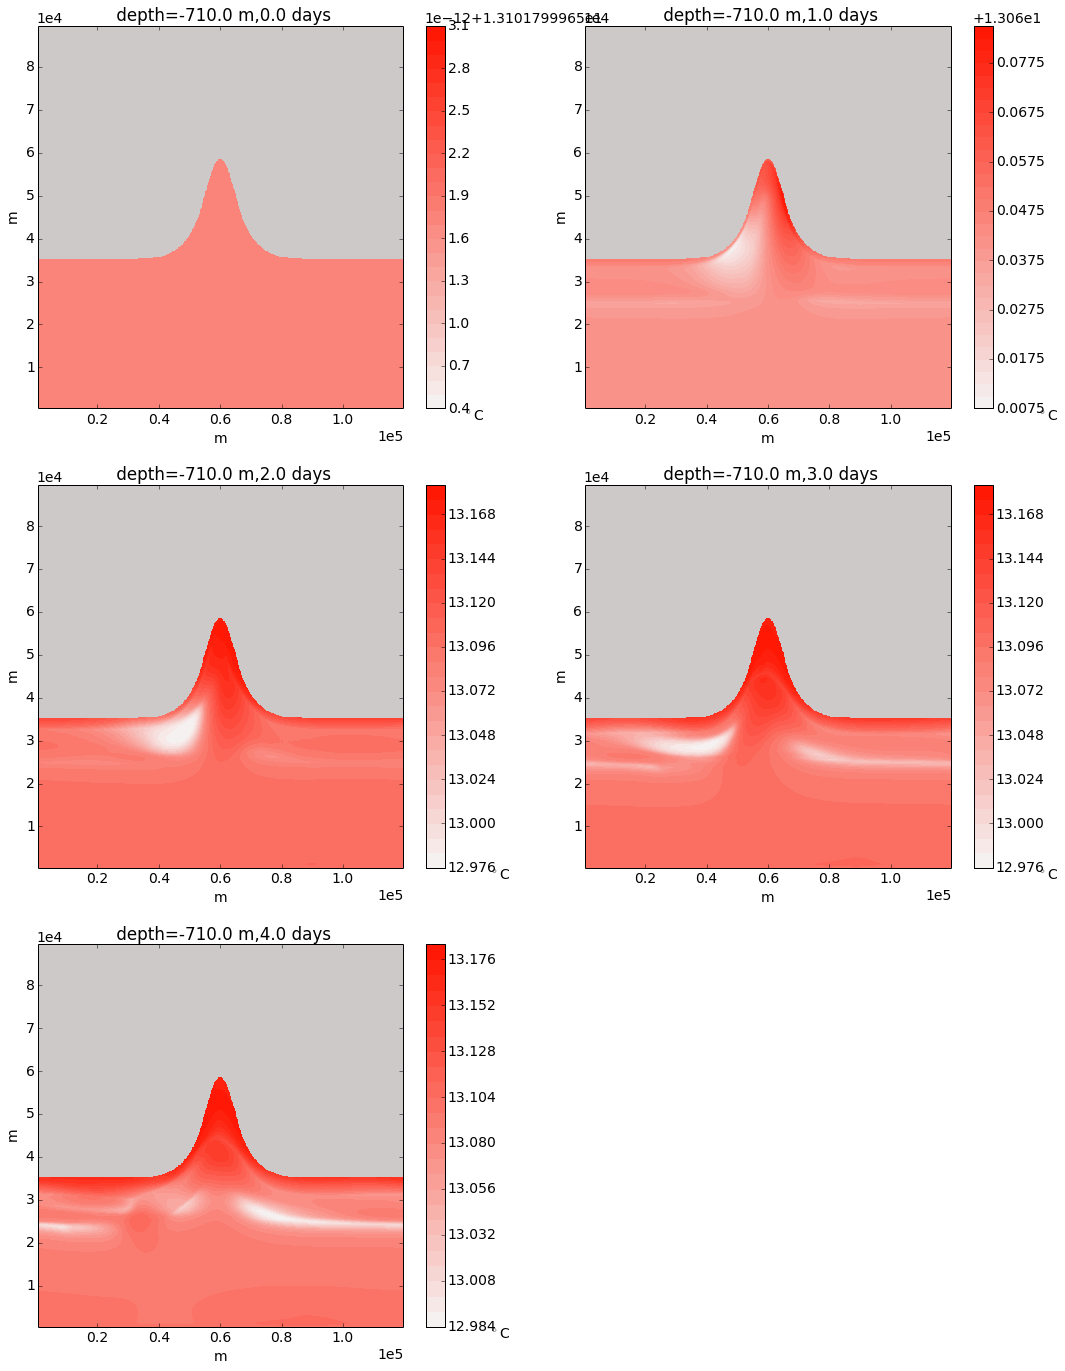

In [23]:
####  PLOT ####

plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,48))

for tt in timesc :
        
        ### Temperature run01
        plt.subplot(6,2,kk)
        
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(xc,yc,temp0b[tt,zlev,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt))
        
        kk=kk+1
        

NO3 PLOTS 

In [25]:
#### NO3 controls for plot ####


NO3b = getField(filename3b, 'NO3')



NO3Maskb = np.ma.array(NO3b,mask=MASKb)


colorsNO3 = [(245.0/255.0,245/255.0,245./255.0), (0./255.0,139.0/255.0,69.0/255.0)] #(white-ish, forest green)


posNO3 = [0, 1] 
 
NumLev = 30 # number of levels for contour



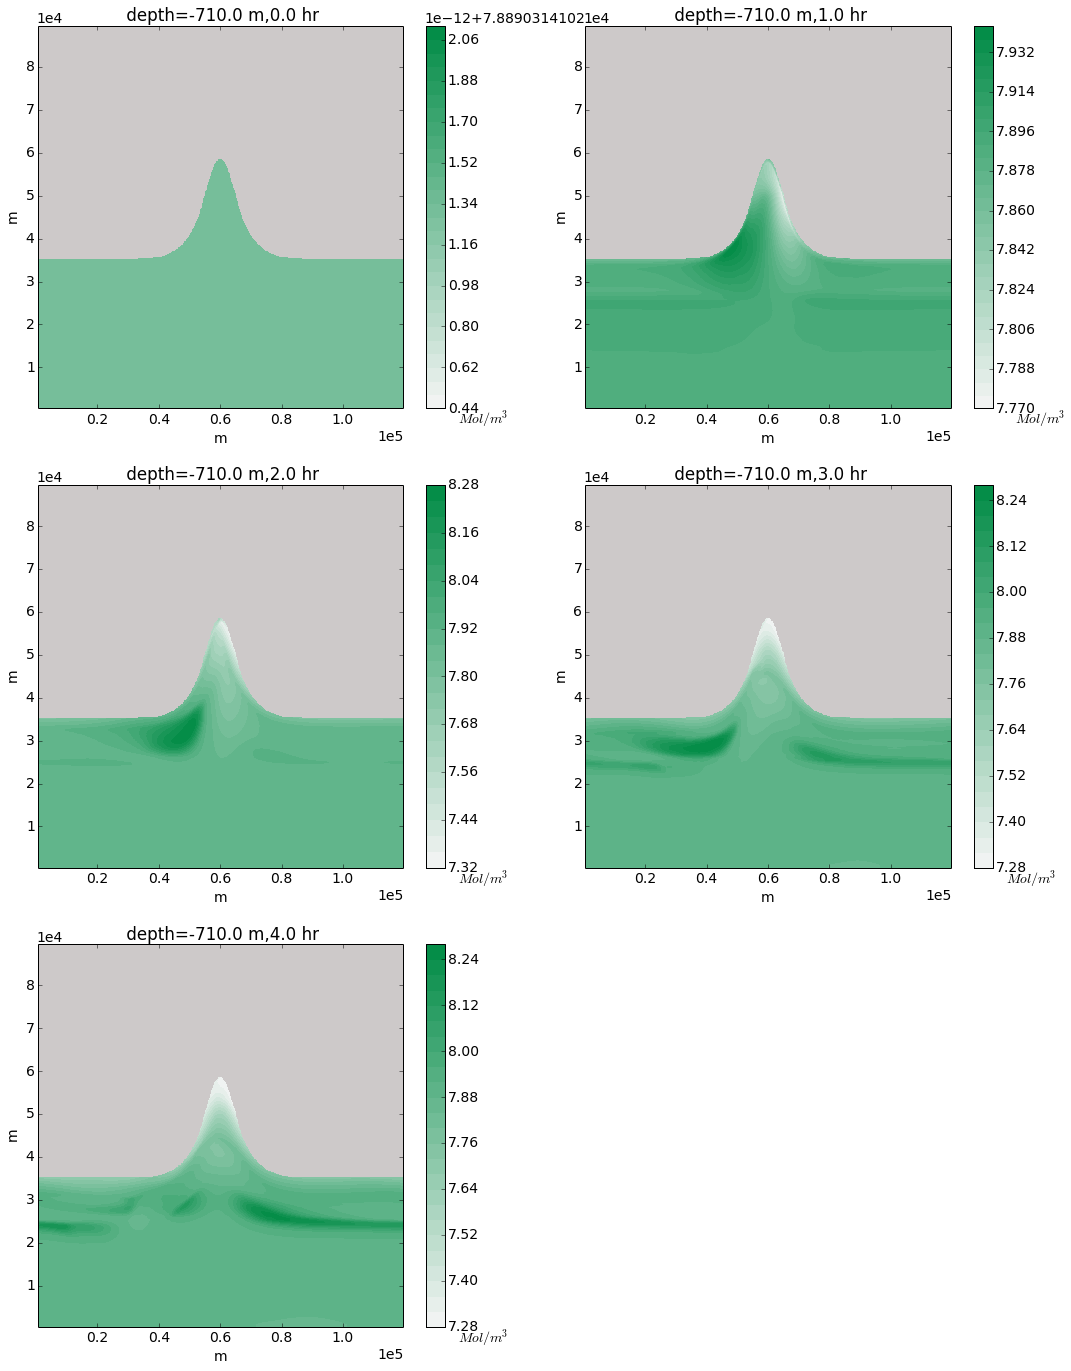

In [26]:
####  PLOT ####

plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,48))

for tt in timesc :
        
        
        ### Temperature run06
        plt.subplot(6,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(xc,yc,NO3Maskb[tt,zlev,:,:],NumLev,cmap=make_cmap(colorsNO3, position=posNO3))
        
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$Mol/m^3$',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f hr " % (z[zlev],tt))
        
                
        
                
        kk=kk+1
        

Velocity plots

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:570: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:570: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


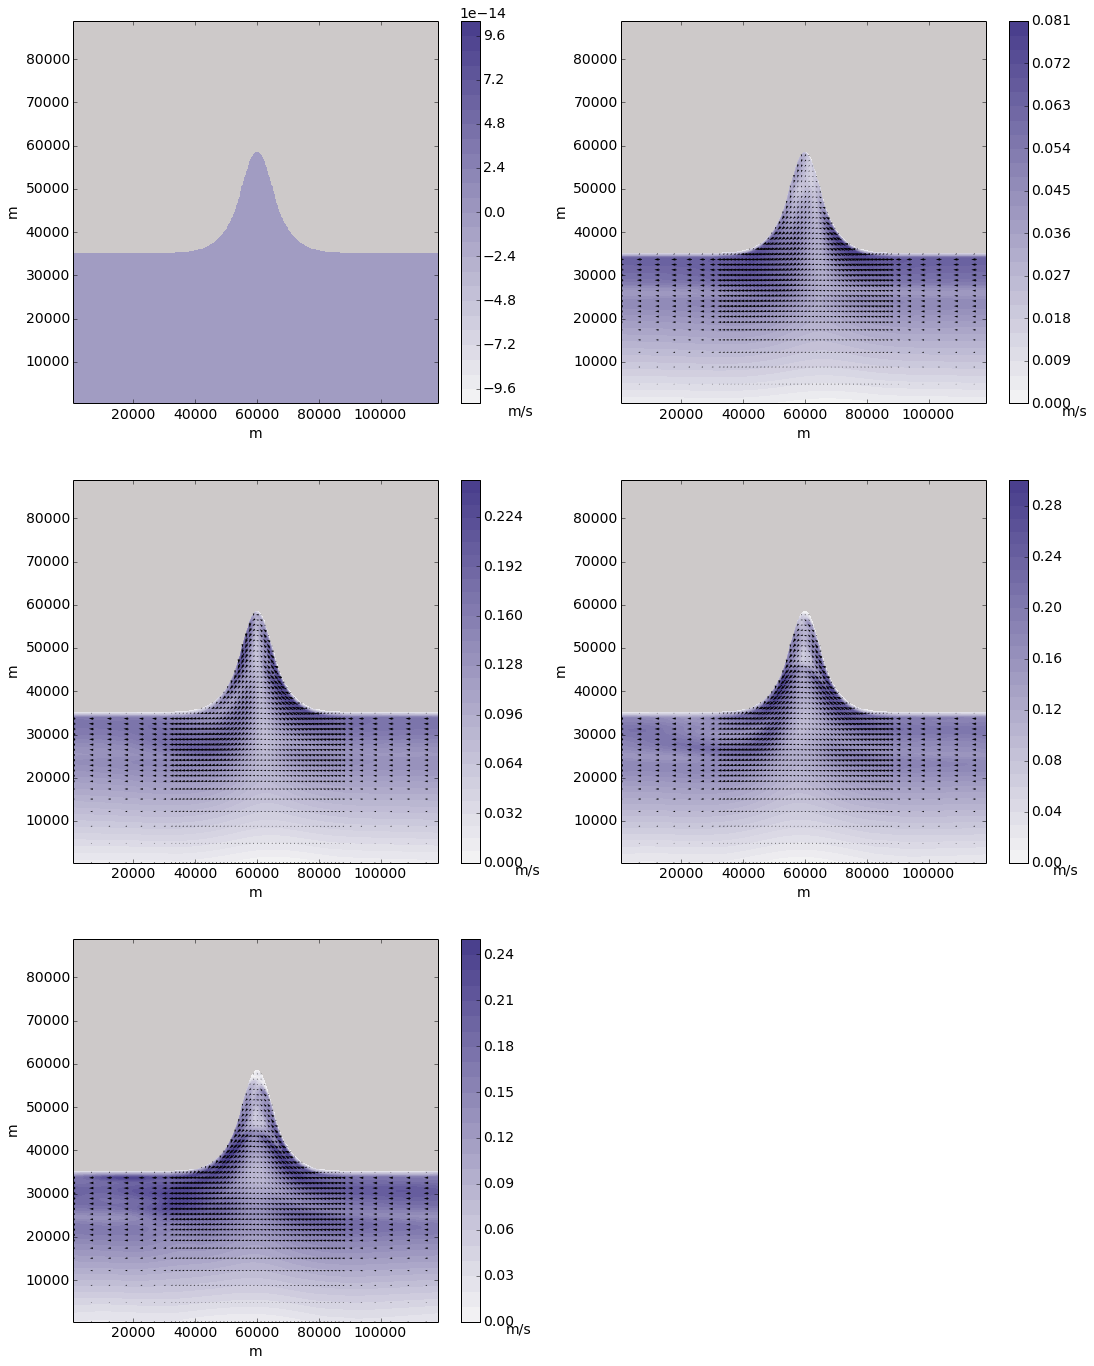

In [27]:
####  PLOT ####

plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,48))

for tt in timesc :
        
        ### Speed and vel vectors, run01
        
        plt.subplot(6,2,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        u2,v2 = unstagger(ugridb[tt,zlev,:,:-1],vgridb[tt,zlev,:-1,:])
        
        umaskb=np.ma.array(u2,mask=MASKb[tt,zlev,:-1,:-1])
        vmaskb=np.ma.array(v2,mask=MASKb[tt,zlev,:-1,:-1])
        
        y_slice = yc[:]#np.arange(0, ny-1)
        x_slice = xc[:]#np.arange(0, nx-1)
        
        arrow_step = 6
        y_slice_a = y_slice[::arrow_step,::arrow_step]
        x_slice_a = x_slice[::arrow_step,::arrow_step]
        
        Usliceb = umaskb[::arrow_step,::arrow_step]
        Vsliceb = vmaskb[::arrow_step,::arrow_step]
        
        #print(np.shape(Uslice))
        #print(np.shape(Vslice))
        #print(np.shape(x_slice_a))
        #print(np.shape(y_slice_a))
        
        spdb = np.sqrt(umaskb**2 + vmaskb**2)
        
        
        pos = [0, 1] # to keep white color on zero
        
        colorsSpd = [(245.0/255.0,245/255.0,245./255.0), (71./255.0,60.0/255.0,139.0/255.0)] #(white-ish, Slate blue 4)
        
        plt.contourf(xc[:-1,:-1],yc[:-1,:-1],spdb,NumLev,cmap=make_cmap(colorsSpd, position=pos))
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        plt.quiver(y_slice_a,x_slice_a,Usliceb,Vsliceb,pivot='middle')
        
        plt.xlabel('m')
        
        plt.ylabel('m')
        
        
        kk=kk+1
        

Line plots across-shelf slice at x = 39.37 km (for T)

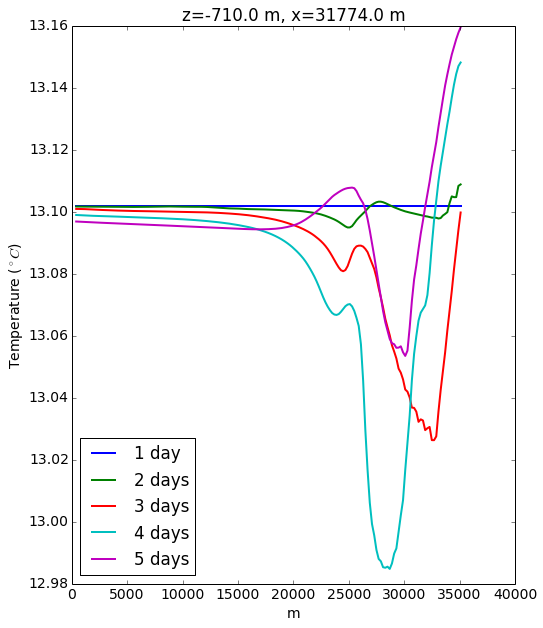

In [28]:

plt.rcParams.update({'font.size':14})

alongshpos = 40

kk=1

fig45=plt.figure(figsize=(27,10))


for ii in timesc:
    
        posTemp = [0, 1] 
       
        NumLev = 30 
        
        plt.subplot(1,3,kk)
        ax=plt.gca()
        plt.plot(yc[:,0],temp0b[ii,zlev,:,alongshpos],linewidth = 2)
        
    
        plt.ylabel('Temperature ($^{\circ}C$)')
        plt.xlabel('m')
        
        plt.show
        plt.title("z=%1.1f m, x=%1.1f m " % (z[zlev],xc[1,alongshpos]))
        

plt.legend(('1 day','2 days','3 days','4 days','5 days'),loc=3)

kk=2




Plot depth vs salinity/temperature


In [46]:
z = StateOutb.variables['Z']
print(z[:])

zl = GridOutb.variables['Zl']
print(zl[:])

zp1 = GridOutb.variables['Zp1']
print(zp1[:])

zu = GridOutb.variables['Zu']
print(zu[:])


depth= GridOutb.variables['Depth']

drc = GridOutb.variables['drC']
print(drc[:])

drf = GridOutb.variables['drF']
print(drf[:])



T = getField(filenameb, 'Temp')
S = getField(filenameb,'S')





[   -2.5    -7.5   -12.5   -17.5   -22.5   -27.5   -32.5   -37.5   -42.5
   -47.5   -52.5   -57.5   -62.5   -67.5   -72.5   -77.5   -82.5   -87.5
   -92.5   -97.5  -102.5  -107.5  -112.5  -117.5  -122.5  -127.5  -132.5
  -137.5  -142.5  -147.5  -152.5  -157.5  -162.5  -167.5  -175.   -185.
  -195.   -205.   -215.   -225.   -235.   -245.   -255.   -270.   -290.
  -310.   -330.   -350.   -370.   -390.   -410.   -430.   -450.   -470.
  -490.   -510.   -530.   -550.   -570.   -590.   -610.   -630.   -650.
  -670.   -690.   -710.   -730.   -750.   -770.   -790.   -810.   -830.
  -850.   -870.   -890.   -910.   -930.   -950.   -970.   -990.  -1010.
 -1030.  -1050.  -1070.  -1090.  -1110.  -1130.  -1150.  -1170.  -1190. ]
[    0.    -5.   -10.   -15.   -20.   -25.   -30.   -35.   -40.   -45.
   -50.   -55.   -60.   -65.   -70.   -75.   -80.   -85.   -90.   -95.
  -100.  -105.  -110.  -115.  -120.  -125.  -130.  -135.  -140.  -145.
  -150.  -155.  -160.  -165.  -170.  -180.  -190.  -200.  -210

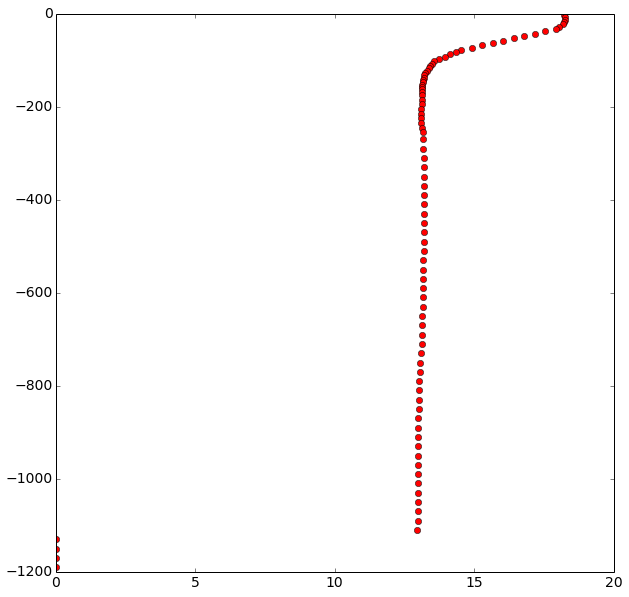

In [49]:
fig46 = plt.figure(figsize=(10,10))

plt.plot(T[0,:,200,180],z[:],'ro')

